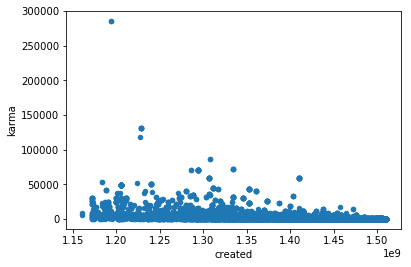

In [172]:
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

data = pd.read_json('users.json')
#pd = json_normalize(data, meta=['karma', 'created'])
#for item in pd :
#    if item["created"] and item["karma"]: 
#        df.append( [ item["created"],  item["karma"]])
df = data[['created','karma']]


### create the plot 
df.plot.scatter(x=0,y=1)




In [176]:

size = data.size
df = df[pd.notnull(df['created'])]
train_data = df[:int(size*0.8)]
test_data = df[int(size*0.2):]
#spilt the data to train and test in a 80:20 ratio
from sklearn.linear_model import LinearRegression
x = train_data["karma"].values.reshape(-1, 1)
y = train_data["created"].values.reshape(-1, 1)
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(x,y)

1382342686.0522211

In [178]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x,y)

1.919261736833088e+18

In [179]:
model.score(x,y)

0.12861506648970567

In [180]:
model.coef_

array([[-3128.04210937]])

In [181]:
model.intercept_

array([  1.39517569e+09])

In [191]:
#predict 
x_t = train_data["karma"].values.reshape(-1, 1)
y_t = train_data["created"].values.reshape(-1, 1)
predictions = model.predict(x_t)
res = model.predict(1000)
days = (res/(1000*60*60*24))
print( days )


[[ 16.11166262]]


In [183]:
model.score(x_t, y_t)

0.12861506648970567

We can se that the model is very well trained as expected from the plot that 
appear to have a perfectly linear shape. 